In [1]:
import re
import itertools
from __future__ import print_function
import pandas as pd
import datetime as dt
import numpy as np
import nltk
import string
import scipy.sparse as sparse
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('seaborn-white')

re_spaces = re.compile(r'\s+')

from mpl_toolkits.mplot3d import axes3d
from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn import metrics
from imblearn.over_sampling import SMOTE,ADASYN
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.naive_bayes import MultinomialNB
from nltk.corpus import stopwords
from sklearn.cross_validation import StratifiedKFold
from sklearn.naive_bayes import BernoulliNB
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import recall_score
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

C:\Users\Shivi\Anaconda3\envs\MachineLearning\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
C:\Users\Shivi\Anaconda3\envs\MachineLearning\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
import spacy
import en_core_web_sm

nlp = en_core_web_sm.load()

In [3]:
import os
import plotly as py
import plotly.graph_objs as go
from numpy import array, linspace, polyfit
from pandas import read_csv
from collections import Counter
from sklearn.linear_model import LinearRegression as LR
from matplotlib.pyplot import scatter, show, legend, figure, plot
from matplotlib.style import use

#To use ployly offline
py.offline.init_notebook_mode(connected=True)
#print(os.listdir("../input/gun-violence-data_01-2013_03-2018.csv"))

# Reading csv file in Pandas

In [423]:
data = read_csv('D:\Knowledge Discovery Database\gun-violence-data\gun-violence-data_01-2013_03-2018.csv')
length = len(data)
print("{0} data has been loaded!".format(length))

239677 data has been loaded!


In [5]:
data

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,1/1/2013,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::20,0::Adult||1::Adult||2::Adult||3::Adult||4::Adult,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726,1/1/2013,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::20,0::Adult||1::Adult||2::Adult||3::Adult,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2,478855,1/1/2013,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::25||1::31||2::33||3::34||4::33,0::Adult||1::Adult||2::Adult||3::Adult||4::Adult,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0
3,478925,1/5/2013,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::29||1::33||2::56||3::33,0::Adult||1::Adult||2::Adult||3::Adult,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
4,478959,1/7/2013,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::18||1::46||2::14||3::47,0::Adult||1::Adult||2::Teen||3::Adult,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0
5,478948,1/7/2013,Oklahoma,Tulsa,6000 block of South Owasso,4,0,http://www.gunviolencearchive.org/incident/478948,http://usnews.nbcnews.com/_news/2013/01/07/163...,False,...,0::23||1::23||2::33||3::55,0::Adult||1::Adult||2::Adult||3::Adult||4::Adu...,0::Female||1::Female||2::Female||3::Female||4:...,0::Rebeika Powell||1::Kayetie Melchor||2::Mist...,NaN,0::Killed||1::Killed||2::Killed||3::Killed||4:...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.kjrh.com/news/local-news/4-found-sh...,72.0,11.0
6,479363,1/19/2013,New Mexico,Albuquerque,2806 Long Lane,5,0,http://www.gunviolencearchive.org/incident/479363,http://hinterlandgazette.com/2013/01/pastor-gr...,False,...,0::51||1::40||2::9||3::5||4::2||5::15,0::Adult||1::Adult||2::Child 0-11||3::Child 0-...,0::Male||1::Female||2::Male||3::Female||4::Fem...,0::Greg Griego||1::Sara Griego||2::Zephania Gr...,5::Family,0::Killed||1::Killed||2::Killed||3::Killed||4:...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.cbsnews.com/news/nehemiah-gringo-ca...,10.0,14.0
7,479374,1/21/2013,Louisiana,New Orleans,LaSalle Street and Martin Luther King Jr. Boul...,0,5,http://www.gunviolencearchive.org/incident/479374,http://www.nola.com/crime/index.ssf/2013/01/no...,False,...,NaN,NaN,0::Male||1::Male||2::Male||3::Male||4::Male,NaN,NaN,

In [7]:
data['date'] = data['date'].apply(lambda x : pd.to_datetime(x)).apply(lambda x : str(x))

In [8]:
years = []
months = []
states = []
days = []
ages = []
killed_count = 0
injured_count = 0

print("Calculating the required data...")

for i in range(length):
    #Get The Gun Violence Data By Years
    dates = data["date"][i]
    year = dates[0:4]
    years.append(year)
    
    #Get The Gun Violence Data By Month
    dates = data["date"][i]
    month = dates[5:7]
    months.append(month)
    
    #Get The Gun Violence Count In States
    all_states = data["state"][i]
    states.append(all_states)
    
    #Get The Count Of Killed People And Injured People 
    each_killed = data["n_killed"][i]
    killed_count = killed_count + each_killed
    each_injured = data["n_injured"][i]
    injured_count = injured_count + each_injured
    
    #Get The Each Gun Violence Data 
    all_days = data["date"][i]
    day = all_days[8:10]
    days.append(day)
    
print("Calculation completed!")

Calculating the required data...
Calculation completed!


# Exploratory Data Analysis

In [57]:
C = Counter(years)

each_years = list(C.keys())
gun_violence_count_of_year = list(C.values())

layout = {
    'title' : 'Gun Violence Data By Years',
    'xaxis' : {'title' : 'Years'},
    'yaxis' : {'title' : 'Gun Violence'}}

trace = go.Bar(
    x = each_years,
    y = gun_violence_count_of_year,
    marker = dict(color='rgb(130,180,200)', line=dict(color='rgb',width=1)))

fig = go.Figure(data = [trace], layout = layout)
py.offline.iplot(fig)

In [30]:
C = Counter(months)

each_month = list(C.keys())
gun_violence_count_of_month = list(C.values())

layout = {
    'title' : 'Gun Violence Data By Months',
    'xaxis' : {'title' : 'Months'},
    'yaxis' : {'title' : 'Gun Violence'}}

trace = go.Bar(
    x = each_month,
    y = gun_violence_count_of_month,
    marker = dict(color='rgb(130,180,200)', line=dict(color='rgb',width=1.5)))

fig = go.Figure(data = [trace], layout = layout)
py.offline.iplot(fig)

In [58]:
C = Counter(states)

each_states = list(C.keys())
gun_violence_count_in_state = list(C.values())

layout = {'title' : 'Gun Violence In All States','yaxis' : {'title' : 'Gun Violence'}}

trace = go.Bar(x = each_states,y = gun_violence_count_in_state,
               marker = dict(color = 'rgb(130,180,200)', line = dict(color = 'rgb',width = 1.5)))

fig = go.Figure(data = [trace], layout = layout)
py.offline.iplot(fig)

In [35]:
labels = ['Killed People', 'Injured People']
values = [killed_count, injured_count]
colors = ['rgb(8,48,107)', 'rgb(158,202,225)']

layout = {
'title' : 'Gun Violence In All States',
}

trace = go.Pie(
    labels=labels, 
    values=values,
    textinfo='value',
    textfont=dict(size=20, color='rgb(255,255,255)'),
    marker=dict(colors=colors, line=dict(color='rgb', width=2))
)

fig = go.Figure(data = [trace], layout = layout)
py.offline.iplot(fig)

In [36]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [457]:
df = pd.read_csv('D:\Knowledge Discovery Database\gun-violence-data\gun-violence-data_01-2013_03-2018.csv')

In [458]:
df['total_loss'] = df['n_killed'] + df['n_injured']

Text(0.5,1,'TOP 10 Cities highest incidents happend')

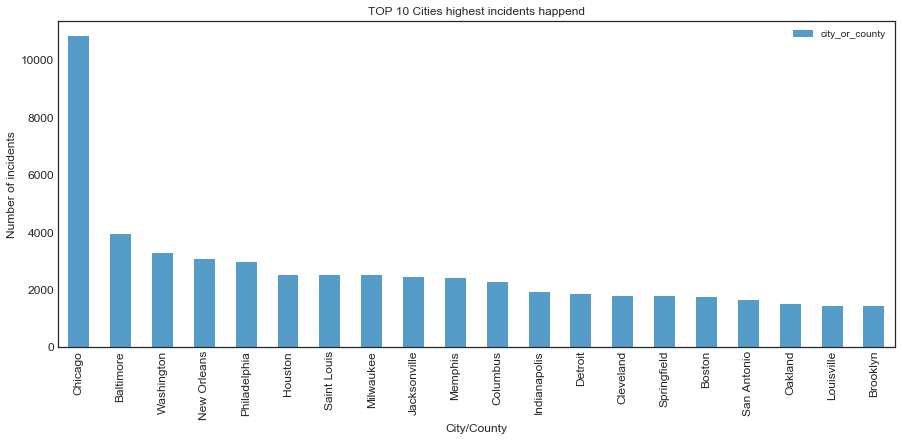

In [459]:
ax = (df['city_or_county'].value_counts().head(20)).plot(kind='bar', title ="TOP 10 Cities highest incidents happend",
    legend=True, fontsize=12, figsize = (15,6), color=(0.05, 0.45, 0.7, 0.7))
ax.set_xlabel("City/County",fontsize=12)
ax.set_ylabel("Number of incidents",fontsize=12)
ax.set_title('TOP 10 Cities highest incidents happend')

Text(0.5,1,'States and Number of persons killed')

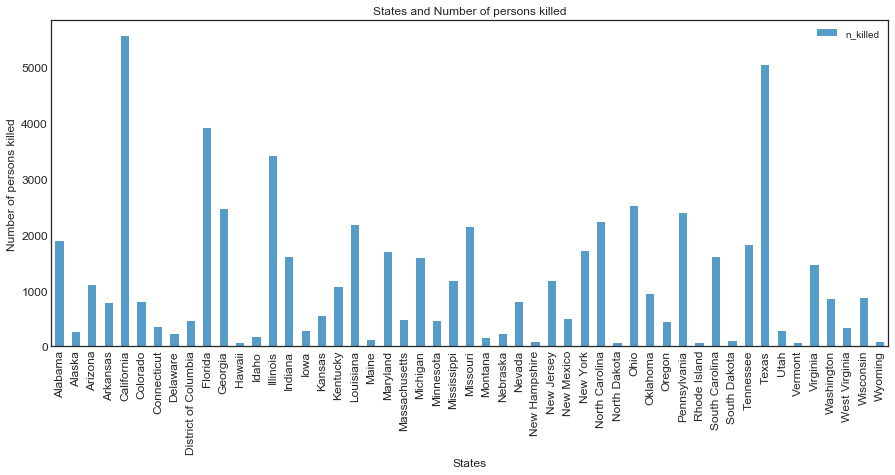

In [460]:
ax = (df[['state', 'n_killed']].reset_index(drop=True).groupby('state').sum()).plot(kind='bar', title ="States and Number of persons killed",
                legend=True, fontsize=12, figsize = (15,6), color=(0.05, 0.45, 0.7, 0.7))
ax.set_xlabel("States",fontsize=12)
ax.set_ylabel("Number of persons killed",fontsize=12)
ax.set_title('States and Number of persons killed')

Text(0.5,1,'States and Total_loss')

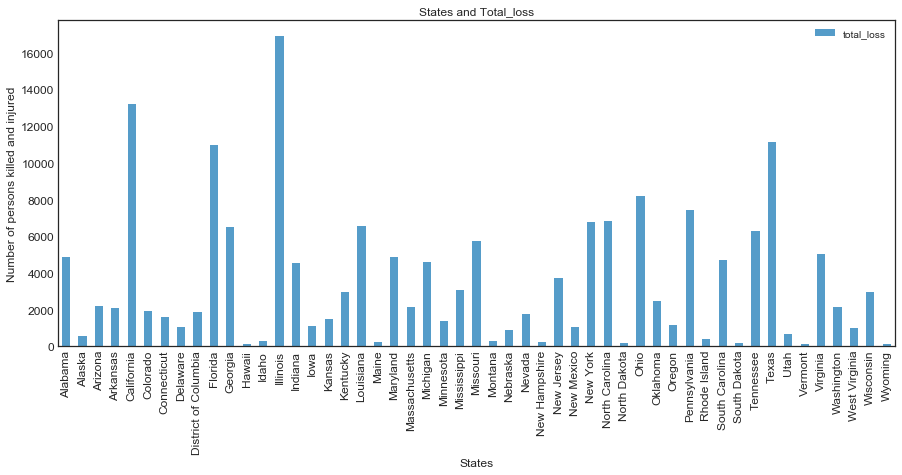

In [461]:
ax = (df[['state', 'total_loss']].reset_index(drop=True).groupby('state').sum()).plot(kind='bar', title ="States and Number of persons killed",
                legend=True, fontsize=12, figsize = (15,6), color=(0.05, 0.45, 0.7, 0.7))
ax.set_xlabel("States",fontsize=12)
ax.set_ylabel("Number of persons killed and injured",fontsize=12)
ax.set_title('States and Total_loss')

In [462]:
#Maximum number of people killed in a single incident 
df[df.n_killed> 20][['state','n_killed']].reset_index(drop =True)

,state,n_killed
0,Florida,50
1,Texas,27


In [463]:
df[df['n_killed'] == max(df['n_killed'])]

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district,total_loss
130448,577157,6/12/2016,Florida,Orlando,1912 S Orange Avenue,50,53,http://www.gunviolencearchive.org/incident/577157,https://www.reuters.com/article/us-orlando-sho...,False,...,0::Adult||1::Adult||2::Adult||3::Adult||4::Adu...,0::Male||1::Male||2::Male||3::Male||4::Male||5...,0::Edward Sotomayor Jr||1::Stanley Almodovar I...,NaN,0::Killed||1::Killed||2::Killed||3::Killed||4:...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.cityoforlando.net/police/mass-shoot...,47.0,12.0,103


In [464]:
df[df['n_injured'] == max(df['n_injured'])]

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district,total_loss
130448,577157,6/12/2016,Florida,Orlando,1912 S Orange Avenue,50,53,http://www.gunviolencearchive.org/incident/577157,https://www.reuters.com/article/us-orlando-sho...,False,...,0::Adult||1::Adult||2::Adult||3::Adult||4::Adu...,0::Male||1::Male||2::Male||3::Male||4::Male||5...,0::Edward Sotomayor Jr||1::Stanley Almodovar I...,NaN,0::Killed||1::Killed||2::Killed||3::Killed||4:...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.cityoforlando.net/police/mass-shoot...,47.0,12.0,103


Get the number of people involved in each incident.

In [465]:
def truncate(a):
    a = a.split('||')
    a  = [x.replace('::','-') for x in a]
    a =  [(x.split('-')) for x in a]
    y = []
    for  i in range (0, len(a)):
        y.append(a[i][-1])
    return(y)  
change = lambda x: truncate(x)
df['participant_gender'] = df['participant_gender'].fillna("0::Zero")
df['People'] = df['participant_gender'].apply(change)

In [466]:
def characteristic(b):
    b = b.split('||')
    #a = [x.replace('_','-') for x in a]
    b = [x for x in b]
    z = []
    for  i in range (0, len(b)):
        z.append(b[i])
    return(b)  

df['incident_characteristics'] = df['incident_characteristics'].fillna("_Zero")
df['incident_characteristics'] = df['incident_characteristics'].apply(lambda x: characteristic(x))

Males, Females count

In [467]:
def count_male (a):
    return(a.count('Male'))
def count_female (a):
    return(a.count('Female'))
check_male = lambda x: count_male(x)
check_female = lambda y: count_female(y)
df['Males'] = df['People'].apply(check_male)
df['Females'] = df['People'].apply(check_female)
df['People_count'] = df['Males'] + df['Females']

In [468]:
def count_shot_wounded (a):
    return(a.count('Shot_Wounded'))
def count_murder (a):
    return(a.count('Murder_Suicide_Accidental'))
def count_caraccident (a):
    return(a.count('Car_accident'))
def count_massshooting (a):
    return(a.count('Mass_Shooting'))

df['Shot_Wounded'] = df['incident_characteristics'].apply(lambda x : count_shot_wounded(x))
df['Murder/Suicide'] = df['incident_characteristics'].apply(lambda x : count_murder(x))
df['Car Accident'] = df['incident_characteristics'].apply(lambda x : count_caraccident(x))
df['Mass Shooting'] = df['incident_characteristics'].apply(lambda x : count_massshooting(x))


def count_arrested (a):
    return(a.count('Arrested'))
def count_injured (a):
    return(a.count('Injured'))
def count_killed (a):
    return(a.count('Killed'))
def count_unharmed (a):
    return(a.count('Unharmed'))

df['participant_status'] = df['participant_status'].fillna("0::Zero")
df['participant_status'] = df['participant_status'].apply(change)
df['Arrested'] = df['participant_status'].apply(lambda x : count_arrested (x))
df['Injured'] = df['participant_status'].apply(lambda x : count_injured (x))
df['Killed'] = df['participant_status'].apply(lambda x : count_killed (x))
df['Unharmed'] = df['participant_status'].apply(lambda x : count_unharmed (x))
#df['participant_status'] = df['Arrested'] + df['Injured'] + df['Killed'] + df['Unharmed']

def count_suspect (a):
    return(a.count('Suspect'))
def count_victim (a):
    return(a.count('Victim'))
df['participant_type'] = df['participant_type'].fillna("0::Zero")
df['participant_type'] = df['participant_type'].apply(change)
df['Suspect'] = df1['participant_type'].apply(lambda x : count_suspect(x))
df['Victim'] = df1['participant_type'].apply(lambda x : count_victim(x))

def count_teen (a):
    return(a.count('Teen'))
def count_adult (a):
    return(a.count('Adult'))
df['participant_age_group'] = df['participant_age_group'].fillna("0::Zero")
df['participant_age_group'] = df['participant_age_group'].apply(change)
df['Adult'] = df['participant_age_group'].apply(lambda x : count_adult (x))
df['Teen'] = df['participant_age_group'].apply(lambda x : count_teen (x))


def count_unknown (a):
    return(a.count('Unknown'))
df['gun_type'] = df['gun_type'].fillna("0::Zero")
df['gun_type'] = df['gun_type'].apply(change)
#df['gun_stolen'] = df['gun_stolen'].apply(lambda x: count_unknown(x))

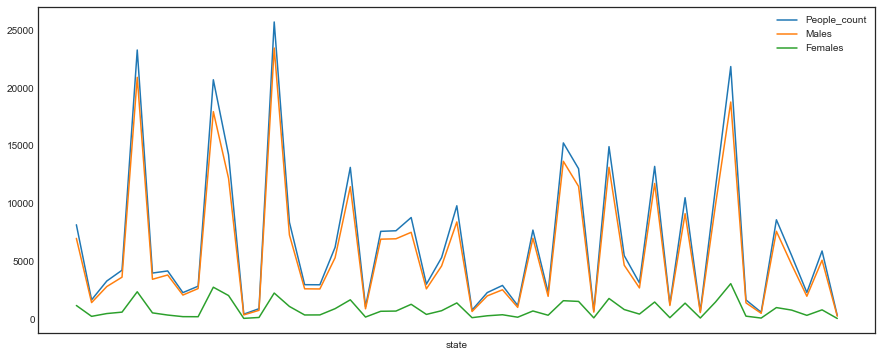

In [472]:
df[['state', 'People_count', 'Males', 'Females']].groupby('state').sum().plot(figsize = (15,6))

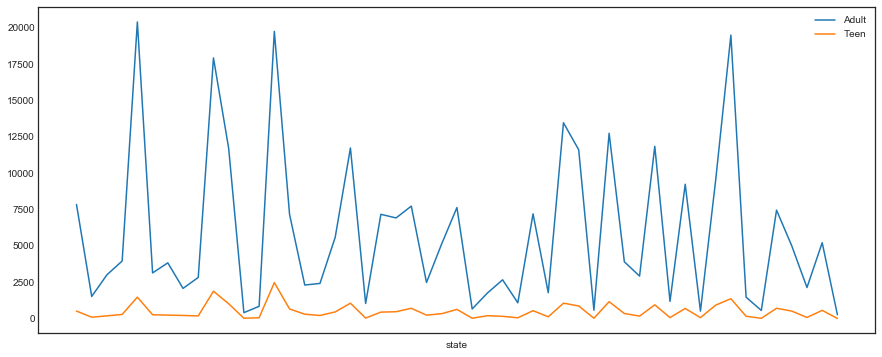

In [469]:
df[['Adult', 'Teen']].groupby(df1['state']).sum().plot(figsize = (15,6))

In [470]:
df1 = df.drop(['address','incident_url','source_url','incident_url_fields_missing','gun_stolen','gun_type','latitude','location_description','longitude','notes','participant_age','participant_status','participant_status','participant_type','participant_age_group','participant_gender','participant_name','participant_relationship','sources','People'], axis = 1)

In [471]:
df1

,incident_id,date,state,city_or_county,n_killed,n_injured,congressional_district,incident_characteristics,n_guns_involved,state_house_district,...,Car Accident,Mass Shooting,Arrested,Injured,Killed,Unharmed,Suspect,Victim,Adult,Teen
0,461105,1/1/2013,Pennsylvania,Mckeesport,0,4,14.0,"[Shot_Wounded, Mass_Shooting, ]",NaN,NaN,...,0,1,1,4,0,0,1,4,5,0
1,460726,1/1/2013,California,Hawthorne,1,3,43.0,"[Shot_Wounded, Murder_Suicide_Accidental, Mass...",NaN,62.0,...,0,1,0,3,1,0,1,4,4,0
2,478855,1/1/2013,Ohio,Lorain,1,3,9.0,"[Shot_Wounded, Murder_Suicide_Accidental, Shot...",2.0,56.0,...,0,0,0,2,1,0,2,3,5,0
3,478925,1/5/2013,Colorado,Aurora,4,0,6.0,"[Murder_Suicide_Accidental, Officer_Involved_S...",NaN,40.0,...,0,0,0,0,4,0,1,3,4,0
4,478959,1/7/2013,North Carolina,Greensboro,2,2,6.0,"[Shot_Wounded, Murder_Suicide_Accidental, Dome...",2.0,62.0,...,0,0,0,2,2,0,1,3,3,1
5,478948,1/7/2013,Oklahoma,Tulsa,4,0,1.0,"[Murder_Suicide_Accidental, Home Invasion, Hom...",NaN,72.0,...,0,1,0,0,4,0,2,4,6,0
6,479363,1/19/2013,New Mexico,Albuquerque,5,0,1.0,"[Murder_Suicide_Accidental, Mass_Shooting, Dom...",2.0,10.0,...,0,1,0,0,5,0,1,5,2,1
7,479374,1/21/2013,Louisiana,New Orleans,0,5,2.0,"[Shot_Wounded, Car_accident, Mass_Shooting]",NaN,93.0,...,1,1,0,5,0,0,1,5,0,0
8,479389,1/21/2013,California,Brentwood,0,4,9.0,"[Shot_Wounded, Car_accident, Mass_Shooting, Ga...",NaN,11.0,...,1,1,0,4,0,1,1,4,1,3
9,492151,1/23/2013,Maryland,Baltimore,1,6,7.0,"[Shot_Wounded, Murder_Suicide_Accidental, Mass...",NaN,NaN,...,0,1,0,6,1,0,0,7,6,1


# Observations :
Illinoise State had the highest Incidents. 17556 incidents.
Chicago City had the highest Incidents . 10814 incident
California and Texas States are highest in number of people killed in the incidents. ( 5562, 5046)
Top Two single incidents where highest number of people killed, occured in Florida( 50 killed) , Texas(27 killed)
One single Incident ID = 577157 where maximum number of people injured (53 ) and maximum number people killed(50) -- This need further exploration
Every Incident More number of Males involved compared to Females

# Linear Regression With Sklearn

In [243]:
days = [int(x) for x in days]

In [244]:
C = Counter(days)
each_days = list(C.keys())
gun_violence_count_by_days = list(C.values())

data = pd.DataFrame({'Days':each_days, 'Gun_Violence':gun_violence_count_by_days})

## Training  Model 

## X and Y array

In [245]:
X = data[['Gun_Violence']]
y = data['Days']

## Train Test Split


In [246]:
from sklearn.model_selection import train_test_split

In [247]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## Creating and Training the Model

In [248]:
from sklearn.linear_model import LinearRegression

In [249]:
lm = LinearRegression()

In [250]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Model Evaluation

In [251]:
# print the intercept
print(lm.intercept_)

14.2083333333


In [252]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Gun_Violence,0.0


## Predictions from our Model

In [253]:
predictions = lm.predict(X_test)

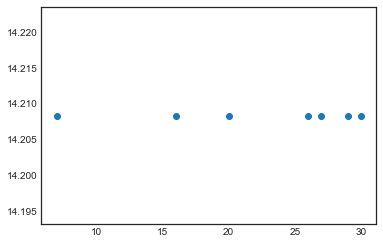

In [254]:
plt.scatter(y_test,predictions)

## Regression Evaluation Metrics

In [101]:
from sklearn import metrics

In [102]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 9.99404761905
MSE: 122.793402778
RMSE: 11.0812184699


# Linear Regression

##  Incidences and States

In [191]:
df1 = pd.DataFrame({'Incidences' : df.groupby(['state'], axis = 0)['state'].count()}).reset_index()

In [196]:
states = df1['state']

In [197]:
state_encoded, state_categories = states.factorize()

In [221]:
state_categories[:10]

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'District of Columbia', 'Florida'],
      dtype='object')

In [215]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
state_encoded_1hot = encoder.fit_transform(state_encoded.reshape(-1,1))
state_encoded_1hot.toarray()

array([[ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.]])

In [227]:
Incidences = array(df1['Incidences'])

In [233]:
Incidences = Incidences.reshape(len(Incidences),1)

In [234]:
X = Incidences
y = states

In [235]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [242]:
lm.fit(X_train,y_train)

In [ ]:
# print the intercept
print(lm.intercept_)

In [ ]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

In [ ]:
predictions = lm.predict(X_test)

# Building a Logistic Regression model

## Training and Predicting Model

In [104]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [105]:
predictions = logmodel.predict(X_test)

## Evaluation

equation of prediction line:
(-0.0001x^7) + (0.0086x^6) + (-0.3646x^5) + (7.916x^4) + (-93.4025x^3) + (587.0757x^2) + (-1776.6876x) + 9709.1968
Real result:	7854
Estimation result:	7763.43
Tolerance of estimated value for month 5:	90.57
Total Tolerance:	9149.7


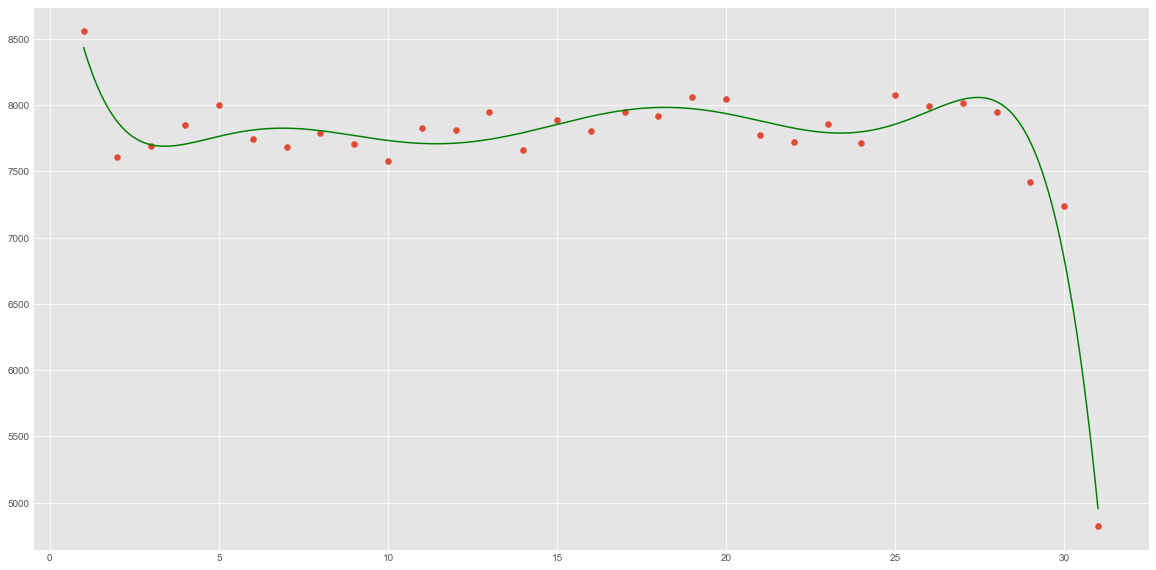

In [13]:
C = Counter(days)
error = 0.0

each_days = list(C.keys())
gun_violence_count_by_days = list(C.values())

#finding coefficients
a,b,c,d,e,f,g,h = polyfit(each_days,gun_violence_count_by_days, 7)

estimation = 5.0

if estimation >= 1 and estimation <= 12:
    result = (a * (estimation ** 7) + b * (estimation ** 6) + c * (estimation ** 5) + d * (estimation ** 4) + 
                e * (estimation ** 3) + f * (estimation ** 2) + g * estimation + h)
    result = round(result, 2)
    tolerance = round(abs(result - gun_violence_count_by_days[int(estimation)]),2)

    z = linspace(1,31,350)

    for i in range(len(gun_violence_count_by_days)):
        error = error + abs(gun_violence_count_by_days[i] - (a*(z[i]**7) + b*(z[i]**6) + c*(z[i]**5) + d*(z[i]**4) + 
                                                          e*(z[i]**3) + f*(z[i]**2) + g*(z[i]) + h))

    error = round(error,2)

    print("Total Tolerance:\t{0}".format(error))

    fig = figure(figsize=(20, 10))
    scatter(each_days,gun_violence_count_by_days)
    plot(z, a * (z ** 7) + b * (z ** 6) + c * (z ** 5) + d * (z ** 4) + e * (z ** 3) + f * (z ** 2) + g * z + h, color="g")
    show()        
else:
    print("The number entered is not in the desired range!")

In [473]:
df1

,incident_id,date,state,city_or_county,n_killed,n_injured,congressional_district,incident_characteristics,n_guns_involved,state_house_district,...,Car Accident,Mass Shooting,Arrested,Injured,Killed,Unharmed,Suspect,Victim,Adult,Teen
0,461105,1/1/2013,Pennsylvania,Mckeesport,0,4,14.0,"[Shot_Wounded, Mass_Shooting, ]",NaN,NaN,...,0,1,1,4,0,0,1,4,5,0
1,460726,1/1/2013,California,Hawthorne,1,3,43.0,"[Shot_Wounded, Murder_Suicide_Accidental, Mass...",NaN,62.0,...,0,1,0,3,1,0,1,4,4,0
2,478855,1/1/2013,Ohio,Lorain,1,3,9.0,"[Shot_Wounded, Murder_Suicide_Accidental, Shot...",2.0,56.0,...,0,0,0,2,1,0,2,3,5,0
3,478925,1/5/2013,Colorado,Aurora,4,0,6.0,"[Murder_Suicide_Accidental, Officer_Involved_S...",NaN,40.0,...,0,0,0,0,4,0,1,3,4,0
4,478959,1/7/2013,North Carolina,Greensboro,2,2,6.0,"[Shot_Wounded, Murder_Suicide_Accidental, Dome...",2.0,62.0,...,0,0,0,2,2,0,1,3,3,1
5,478948,1/7/2013,Oklahoma,Tulsa,4,0,1.0,"[Murder_Suicide_Accidental, Home Invasion, Hom...",NaN,72.0,...,0,1,0,0,4,0,2,4,6,0
6,479363,1/19/2013,New Mexico,Albuquerque,5,0,1.0,"[Murder_Suicide_Accidental, Mass_Shooting, Dom...",2.0,10.0,...,0,1,0,0,5,0,1,5,2,1
7,479374,1/21/2013,Louisiana,New Orleans,0,5,2.0,"[Shot_Wounded, Car_accident, Mass_Shooting]",NaN,93.0,...,1,1,0,5,0,0,1,5,0,0
8,479389,1/21/2013,California,Brentwood,0,4,9.0,"[Shot_Wounded, Car_accident, Mass_Shooting, Ga...",NaN,11.0,...,1,1,0,4,0,1,1,4,1,3
9,492151,1/23/2013,Maryland,Baltimore,1,6,7.0,"[Shot_Wounded, Murder_Suicide_Accidental, Mass...",NaN,NaN,...,0,1,0,6,1,0,0,7,6,1


In [474]:
df1['n_guns_involved'] = df1['n_guns_involved'].replace(np.nan, 0.0)

In [475]:
def shot(x):
    keep =['Shot_Wounded']
    for rem in x:
        if rem in keep:
            return 1

In [476]:
def murder(x):
    keep =['Murder_Suicide_Accidental']
    for rem in x:
        if rem in keep:
            return 2

In [477]:
def mass(x):
    keep =['Mass_Shooting']
    for rem in x:
        if rem in keep:
            return 3

In [478]:
df1['Shot_Wounded'] = df1['incident_characteristics'].apply(lambda x: shot(x))

In [479]:
df1['Muder_Suicide'] = df1['incident_characteristics'].apply(lambda x: murder(x))

In [480]:
df1['Mass_Shooting'] = df1['incident_characteristics'].apply(lambda x: mass(x))

In [481]:
df1['Mass_Shooting'] = df1['Mass_Shooting'].replace(np.nan, 0.0)
df1['Muder_Suicide'] = df1['Muder_Suicide'].replace(np.nan, 0.0)
df1['Shot_Wounded'] = df1['Shot_Wounded'].replace(np.nan, 0.0)

In [482]:
test = df1.loc[:, ['Mass_Shooting','Muder_Suicide', 'Shot_Wounded']]

# Creating Dataset for clustering

In [483]:
df1['case'] = df1['Mass_Shooting'] + df1['Muder_Suicide'] + df1['Shot_Wounded']

## Creating the Clusters

In [484]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)

## Fitting k-mean cluster

In [485]:
kmeans.fit(df1[['case']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Cluster center and labels

In [420]:
kmeans.cluster_centers_

array([[ -5.94635452e-13],
       [  1.00000000e+00],
       [  2.00000000e+00],
       [  3.00000000e+00]])

In [421]:
kmeans.labels_

array([2, 3, 2, ..., 1, 1, 1])

In [ ]:
f, ax1 = plt.plot(figsize=(10,6))
ax1.set_title('K Means')
ax1.scatter(df1['case'], df['state'],c=kmeans.labels_,cmap='rainbow')